In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection

from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/train.csv')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/test.csv')

data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

print('Kolom data Train dengan nilai NULL:\n', data1.isnull().sum())
print("-"*10)
print('Kolom data Test dengan nilai NULL:\n', data_val.isnull().sum())
print("-"*10)

print(data_raw.describe(include='all'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kolom data Train dengan nilai NULL:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Kolom data Test dengan nilai NULL:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            N

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection

from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/train.csv')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/test.csv')

data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

for dataset in data_cleaner:
    # isikan age yang kosong dengan median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    # isikan embarked dengan modus
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    # isikan fare dengan median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

# hapus atribut cabin dan lainnya yang kita anggap tidak diperlukan
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


<ipython-input-11-d448f2b9f4f0>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
<ipython-input-11-d448f2b9f4f0>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection

from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/train.csv')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/test.csv')

data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

# Menghapus kolom yang tidak diperlukan
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] else x)

print(data1['Title'].value_counts())
print("-"*10)

data1.info()
data_val.info()
data1.sample(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 no

<ipython-input-12-4008ab3090ff>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
<ipython-input-12-4008ab3090ff>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
545,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,26.0000,S,1,1,Mr,"(14.454, 31.0]","(48.0, 64.0]"
431,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,28.0,1,0,16.1000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
754,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,65.0000,S,4,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
844,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
53,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
853,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,39.4000,S,2,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
388,0,3,"Sadlier, Mr. Matthew",male,28.0,0,0,7.7292,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
332,0,1,"Graham, Mr. George Edward",male,38.0,0,1,153.4625,S,2,0,Mr,"(31.0, 512.329]","(32.0, 48.0]"
419,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,24.1500,S,3,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(64.0, 80.0]"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64
----------
Sex       female      male
Title                     
Master       NaN  0.575000
Misc    1.000000  0.250000
Miss    0.697802       NaN
Mr           NaN  0.156673
Mrs     0.792000       NaN
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  IsAlone Title  \
0    male  22.0      1      0   7.2500        

<ipython-input-3-7c73f75174d8>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
<ipython-input-3-7c73f75174d8>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

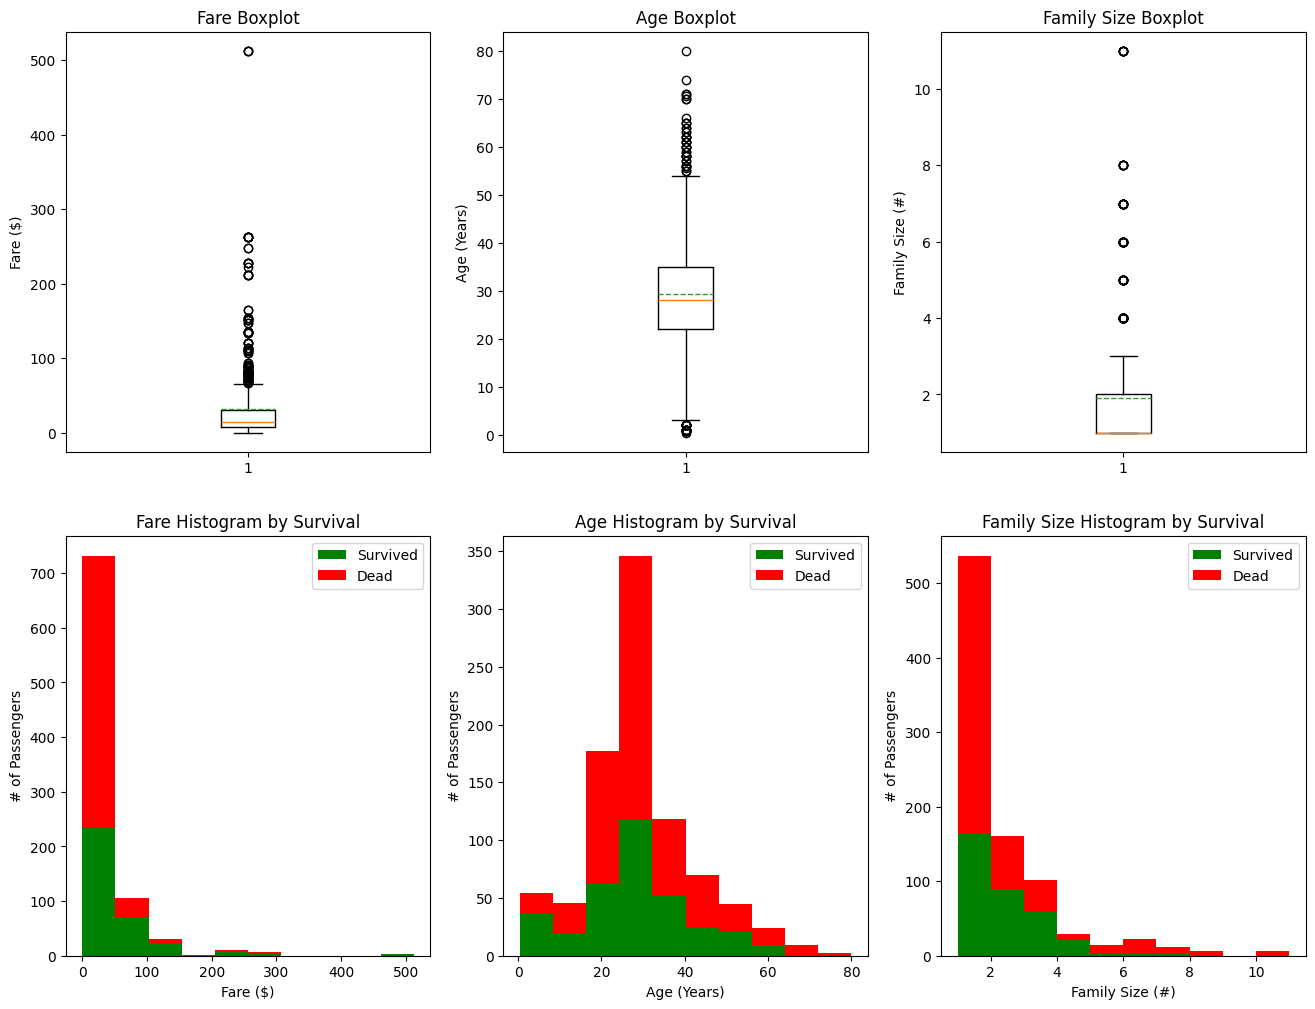

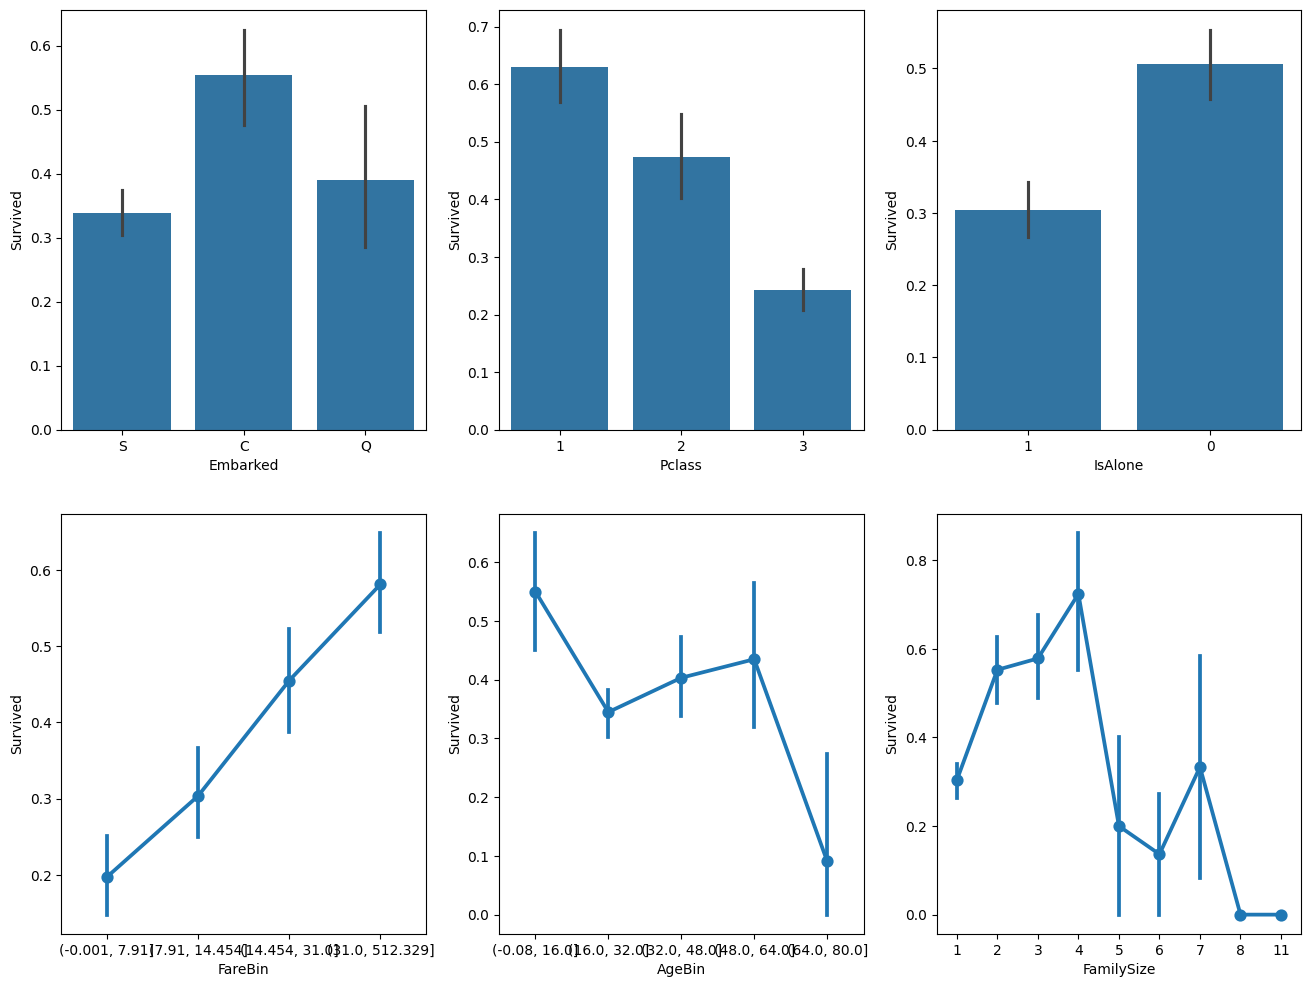

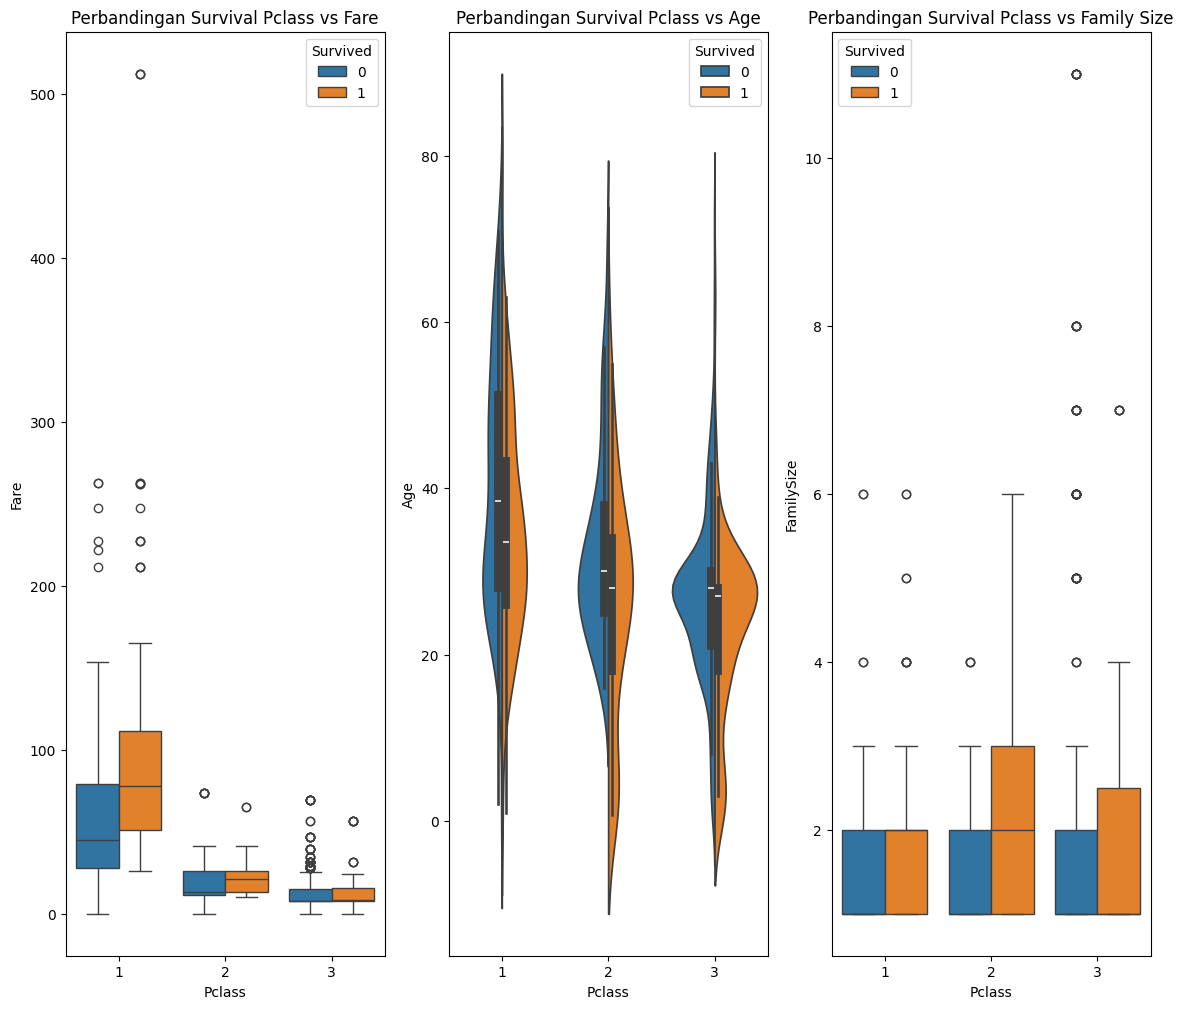

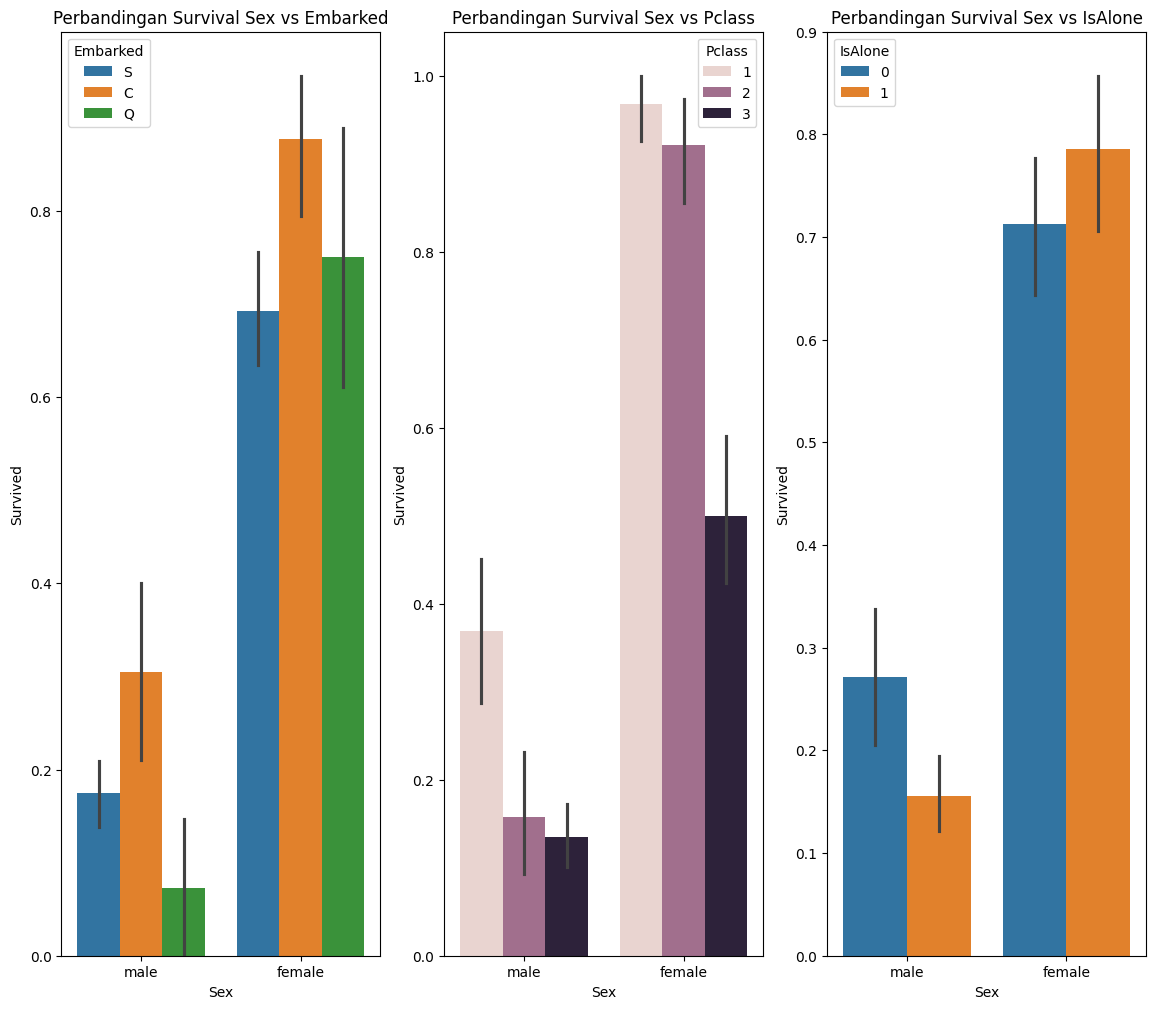

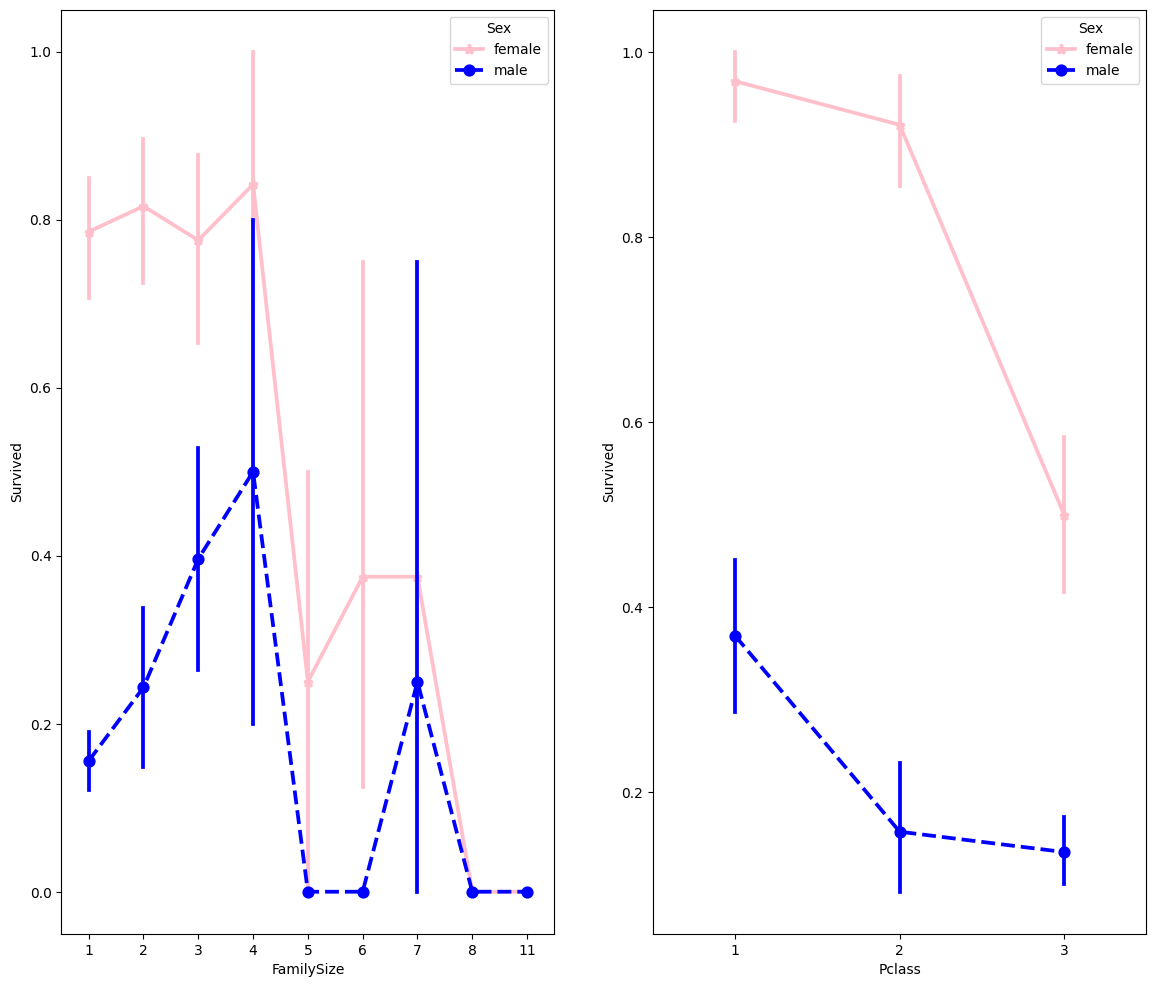

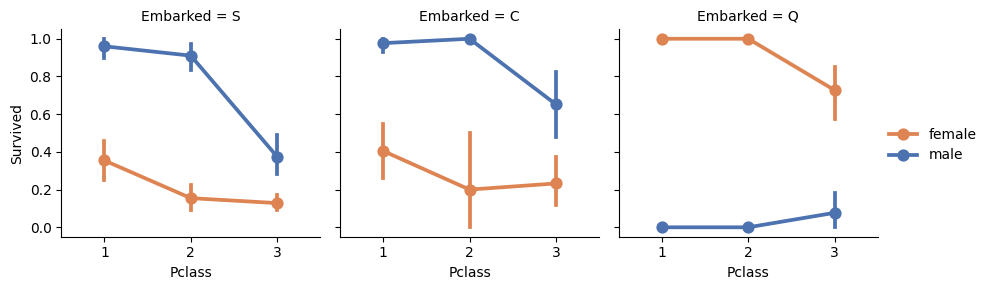

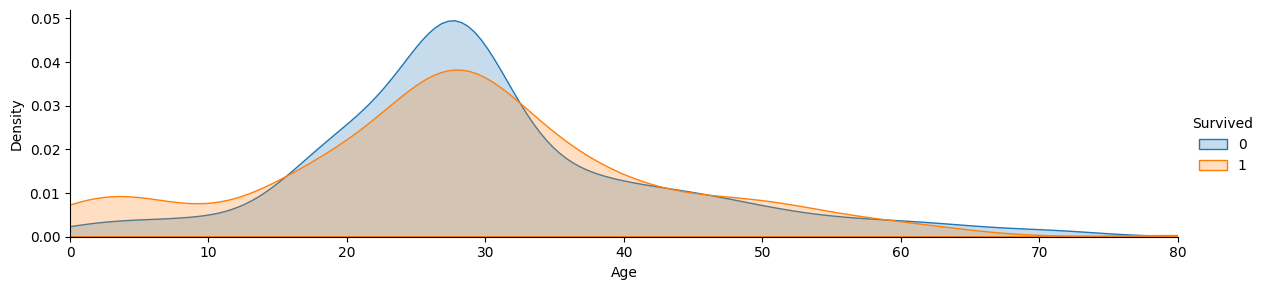

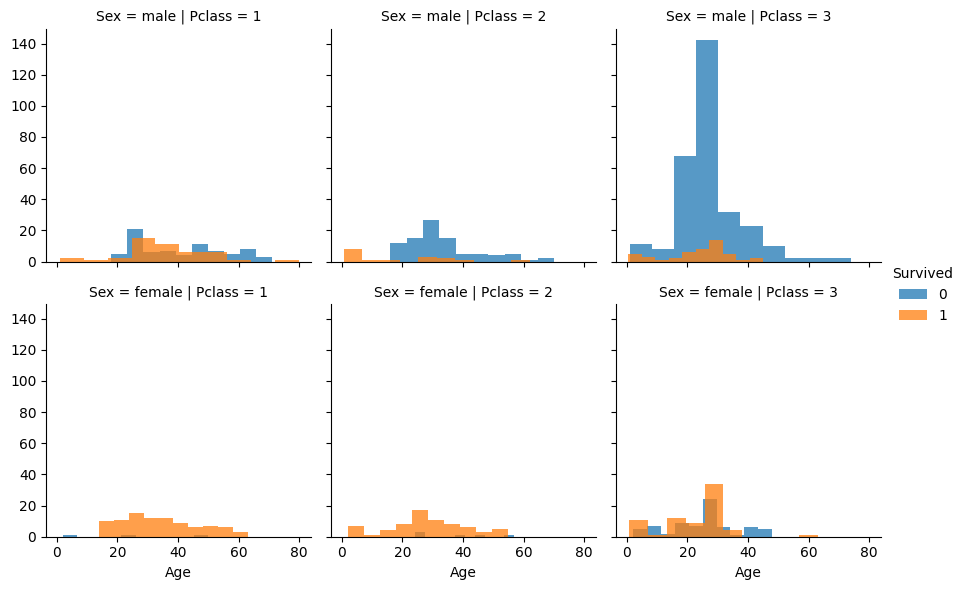

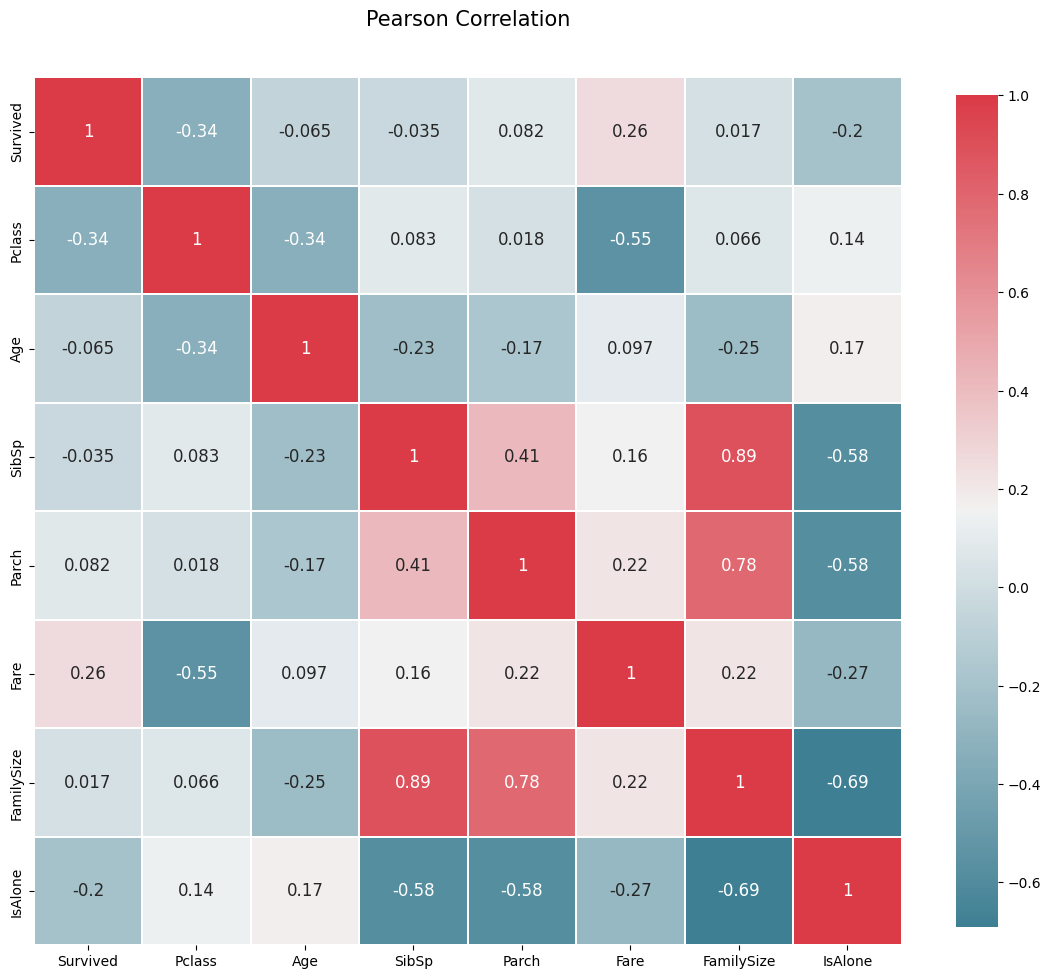

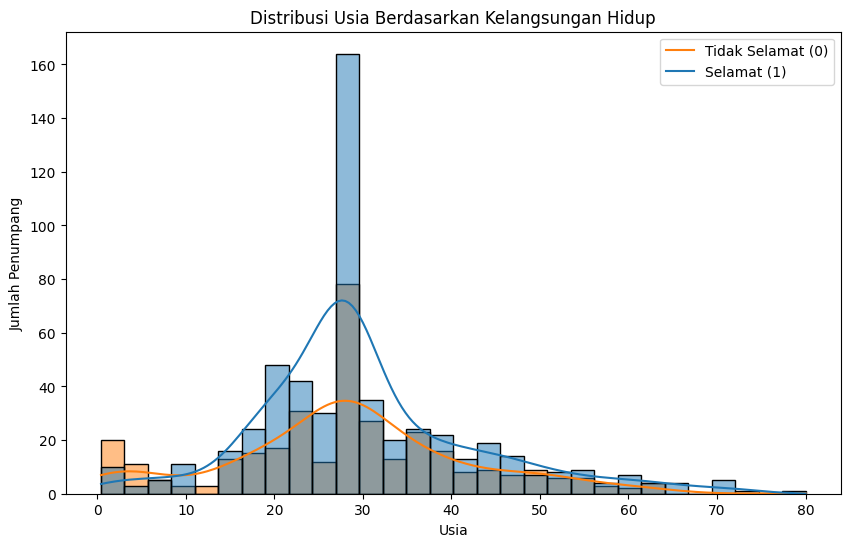

<ipython-input-3-7c73f75174d8>:214: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=data1, ci=None)


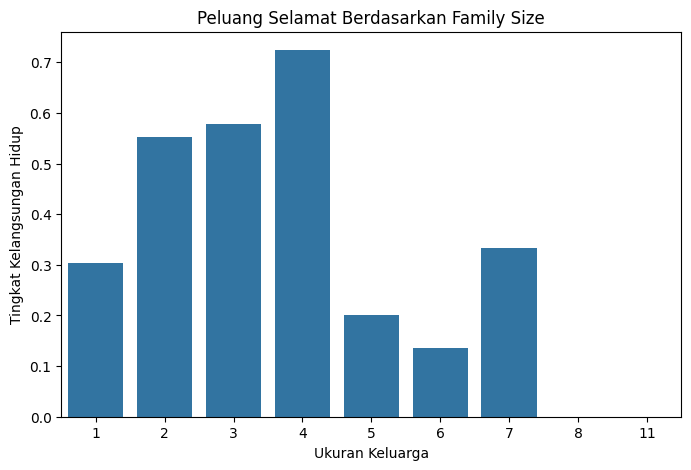

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection

from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/train.csv')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/titanic/test.csv')

data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

# Menghapus kolom yang tidak diperlukan
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] else x)

print(data1['Title'].value_counts())
print("-"*10)

# Memastikan 'Title' ada di dataset sebelum digunakan
if 'Title' in data1.columns:
    # Membuat pivot table berdasarkan Title dan Sex
    pivot_table = data1.pivot_table(index='Title', columns='Sex', values='Survived', aggfunc='mean')

    # Menampilkan hasil pivot table
    print(pivot_table)
else:
    print("Error: Kolom 'Title' tidak ditemukan. Pastikan tahap sebelumnya dijalankan dengan benar.")

print(data1.head())

Target = ['Survived']
data1_x = data1.columns.drop(Target)

for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Korelasi Survival dengan:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

print(pd.crosstab(data1['Title'], data1[Target[0]]))


plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']],
         stacked=True, color = ['g','r'], label = ['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']],
         stacked=True, color = ['g','r'], label = ['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']],
         stacked=True, color = ['g','r'], label = ['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

#kita gunakan seaborn untuk perbandingan antar variabel: https://seaborn.pydata.org/api.html
#graph individual features dengan survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived', data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived', data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

#grafik distribusi dari data kualitatif: Pclass
#Pclass cukup tinggi korelasinya dengan survival, berikut akan ditunjukkan perbandingan Pclass dengan bbrp fitur lain

fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Perbandingan Survival Pclass vs Fare')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Perbandingan Survival Pclass vs Age')

sns.boxplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Perbandingan Survival Pclass vs Family Size')

#grafik distribusi dari data kualitatif: Sex
#Sex cukup tinggi korelasinya dengan survival, berikut akan ditunjukkan perbandingan Sex dengan bbrp fitur lain

fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
qaxis[0].set_title('Perbandingan Survival Sex vs Embarked')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax = qaxis[1])
qaxis[1].set_title('Perbandingan Survival Sex vs Pclass')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax = qaxis[2])
qaxis[2].set_title('Perbandingan Survival Sex vs IsAlone')


#contoh grafik perbandingan lainnya
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#bagaimana pengaruh faktor ukuran keluarga terhadap perbandingan jenis kelamin dan survival
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#bagaimana pengaruh faktor class terhadap perbandingan jenis kelamin dan survival
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
    palette={"male": "blue", "female": "pink"},
    markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)


#bagaimana pengaruh faktor port keberangkatan terhadap perbandingan Pclass, sex, dan survival
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()


#plot distribusi dari usia penumpang yang selamat / tidak selamat
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

#perbandingan histogram dari sex, class, dan age dengan survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

#Korelasi heatmap dari dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    # Hanya dipilih fitur numerik saja
    numerical_df = df.select_dtypes(include=['number'])

    _ = sns.heatmap(
        numerical_df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title('Pearson Correlation', y=1.05, size=15)

correlation_heatmap(data1)

plt.figure(figsize=(10,6))
sns.histplot(data=data1, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribusi Usia Berdasarkan Kelangsungan Hidup')
plt.xlabel('Usia')
plt.ylabel('Jumlah Penumpang')
plt.legend(['Tidak Selamat (0)', 'Selamat (1)'])
plt.show()


plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=data1, ci=None)
plt.title('Peluang Selamat Berdasarkan Family Size')
plt.xlabel('Ukuran Keluarga')
plt.ylabel('Tingkat Kelangsungan Hidup')
plt.show()